In [4]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Flatten, Dropout
from keras.utils.np_utils import to_categorical
from keras.layers.convolutional import Conv2D, MaxPooling2D
import random
import pickle
import pandas as pd
import cv2
import os
os.chdir('D:\Python-Project-Traffic-Sign-Classification\Traffic sign classification')

In [5]:
np.random.seed(0)
labelFile = 'D:\Python-Project-Traffic-Sign-Classification\Traffic sign classification\labels.csv' # file with all names of classes
training_file = r'D:\Python-Project-Traffic-Sign-Classification\Traffic sign classification\train.p'
testing_file = r'D:\Python-Project-Traffic-Sign-Classification\Traffic sign classification\test.p'
val_file = r'D:\Python-Project-Traffic-Sign-Classification\Traffic sign classification\valid.p'
train_data = pickle.load(open(training_file, "rb"))
test_data = pickle.load(open(testing_file, "rb"))
val_data = pickle.load(open(testing_file, "rb"))

# Splitting out features and labels
X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']
     
print("The dimensions of x_train is:",X_train.shape)
print("The dimensions of x_test is:",X_test.shape)
print("The dimensions of x_val is:",X_val.shape)


The dimensions of x_train is: (34799, 32, 32, 3)
The dimensions of x_test is: (12630, 32, 32, 3)
The dimensions of x_val is: (12630, 32, 32, 3)


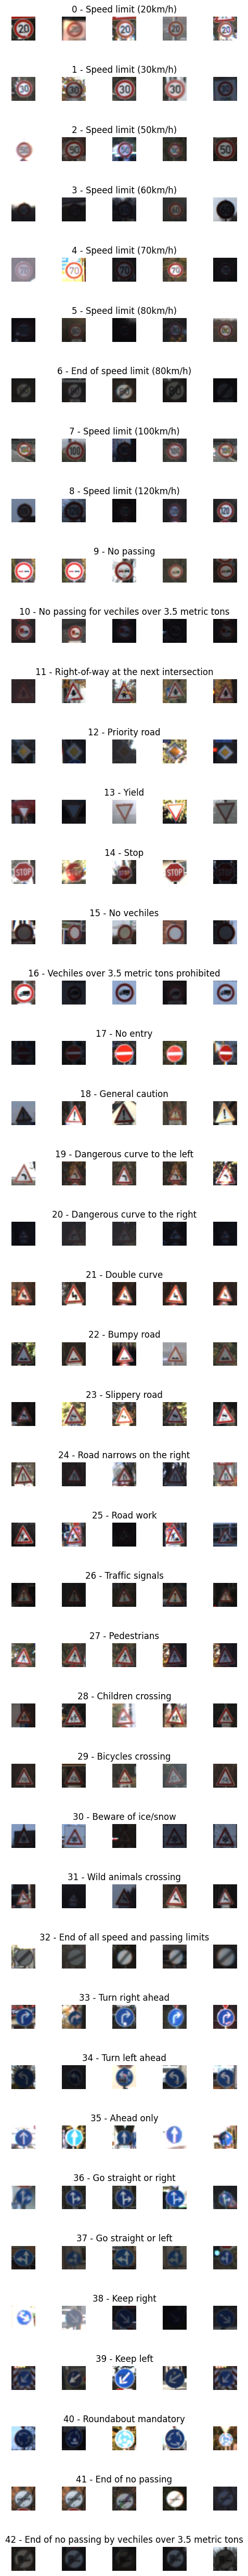

In [6]:
data = pd.read_csv('D:\Python-Project-Traffic-Sign-Classification\Traffic sign classification\labels.csv')
      
num_of_samples=[]
     
cols = 5
num_classes = 43
     
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()
     
for i in range(cols):
  for j, row in data.iterrows():
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
           axs[j][i].set_title(str(j) + " - " + row["labels"])
           num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


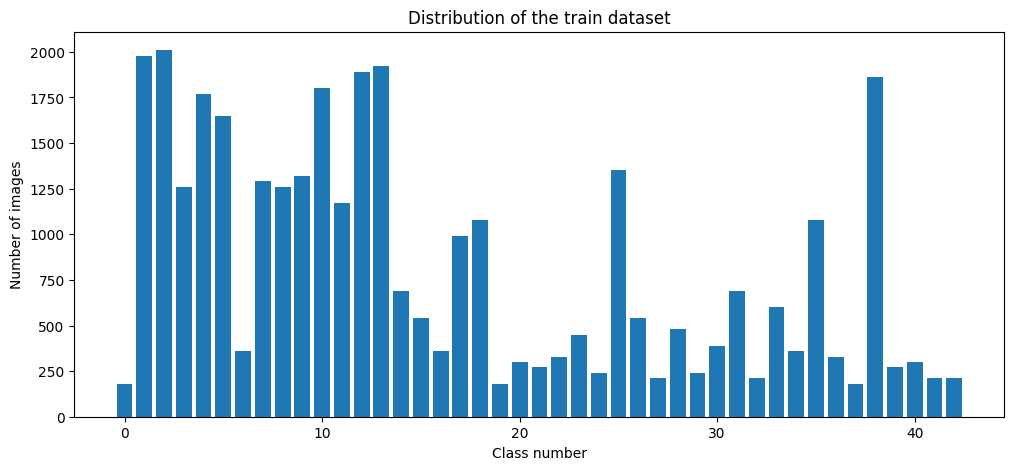

In [7]:
print(num_of_samples)
plt.figure(figsize=(12, 5))
plt.bar(range(0, 43), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

(32, 32, 3)
1


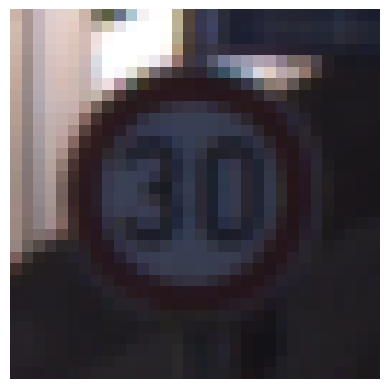

In [8]:
import cv2
     
plt.imshow(X_train[2420])
plt.axis("off")
print(X_train[2420].shape)
print(y_train[2420])



(32, 32)


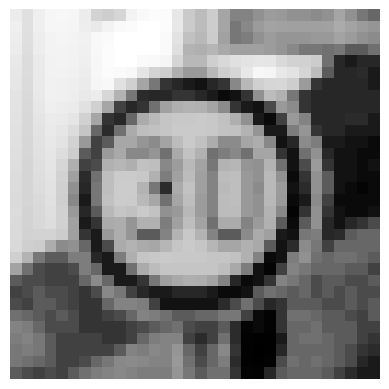

In [9]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img


def equalize(img):
    img = cv2.equalizeHist(img)
    return img


def preprocess(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img
img =preprocess(X_train[2420])
plt.imshow(img,cmap='gray')
plt.axis("off")
print(img.shape)

(34799, 32, 32)


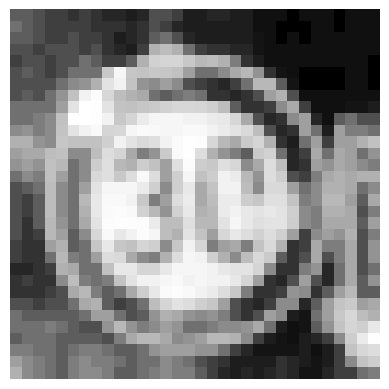

In [10]:
X_train = np.array(list(map(preprocess, X_train)))
X_test = np.array(list(map(preprocess, X_test)))
X_val = np.array(list(map(preprocess, X_val)))
     
plt.imshow(X_train[random.randint(0, len(X_train) - 1)],cmap='gray')
plt.axis('off')
print(X_train.shape)

In [11]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
X_val = X_val.reshape(12630, 32, 32, 1)

the X_batch shape is: (15, 32, 32, 1)


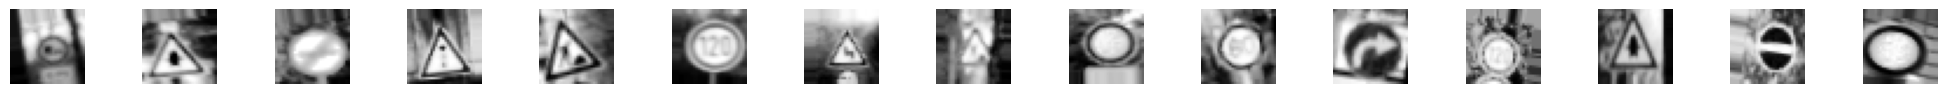

In [12]:
from keras.preprocessing.image import ImageDataGenerator
     
datagen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10.)
     
datagen.fit(X_train)


batches = datagen.flow(X_train, y_train, batch_size = 15)
X_batch, y_batch = next(batches)
     
fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()
     
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32, 32))
    axs[i].imshow(X_batch[i].reshape(32, 32),cmap='gray')
    axs[i].axis("off")
     
print("the X_batch shape is:",X_batch.shape)

In [13]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)

# create model
     
def modified_model():
   model = Sequential()
   model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu'))
   model.add(Conv2D(60, (5, 5), activation='relu'))
   model.add(Conv2D(60, (5, 5), activation='relu'))
   model.add(MaxPooling2D(pool_size=(2, 2)))
   model.add(Conv2D(30, (3, 3), activation='relu')) 
   model.add(Conv2D(30, (3, 3), activation='relu'))
   model.add(Conv2D(30, (3, 3), activation='relu'))
   model.add(MaxPooling2D(pool_size=(2, 2)))
      
   model.add(Flatten())
   model.add(Dense(500, activation='relu'))
   model.add(Dropout(0.5))
   model.add(Dense(43, activation='softmax'))
      
   model.compile(Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
   return model

In [15]:
model = modified_model()
print(model.summary())
     
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=50),
                              steps_per_epoch=X_train.shape[0]/50,
                              epochs=10,
                              validation_data=(X_val, y_val), shuffle = 1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 60)        1560      
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 conv2d_8 (Conv2D)           (None, 20, 20, 60)        90060     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 60)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 30)          16230     
                                                                 
 conv2d_10 (Conv2D)          (None, 6, 6, 30)          8130      
                                                      

C:\Users\HADHY HUSSAIN\AppData\Local\Temp\ipykernel_31492\1042203148.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=50),


695/695 [==============================] - 258s 369ms/step - loss: 2.0528 - accuracy: 0.4185 - val_loss: 0.5711 - val_accuracy: 0.8460
Epoch 2/10
695/695 [==============================] - 236s 339ms/step - loss: 0.6278 - accuracy: 0.8088 - val_loss: 0.2858 - val_accuracy: 0.9172
Epoch 3/10
695/695 [==============================] - 236s 339ms/step - loss: 0.3706 - accuracy: 0.8874 - val_loss: 0.2235 - val_accuracy: 0.9386
Epoch 4/10
695/695 [==============================] - 245s 351ms/step - loss: 0.2830 - accuracy: 0.9147 - val_loss: 0.2036 - val_accuracy: 0.9454
Epoch 5/10
695/695 [==============================] - 232s 333ms/step - loss: 0.2266 - accuracy: 0.9323 - val_loss: 0.1602 - val_accuracy: 0.9576
Epoch 6/10
695/695 [==============================] - 244s 351ms/step - loss: 0.1947 - accuracy: 0.9423 - val_loss: 0.1881 - val_accuracy: 0.9519
Epoch 7/10
695/695 [==============================] - 266s 382ms/step - loss: 0.1617 - accuracy: 0.9507 - val_loss: 0.1873 - val_accura

Text(0.5, 0, 'epoch')

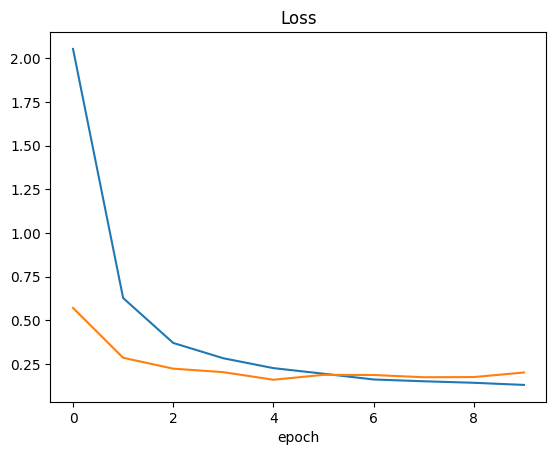

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

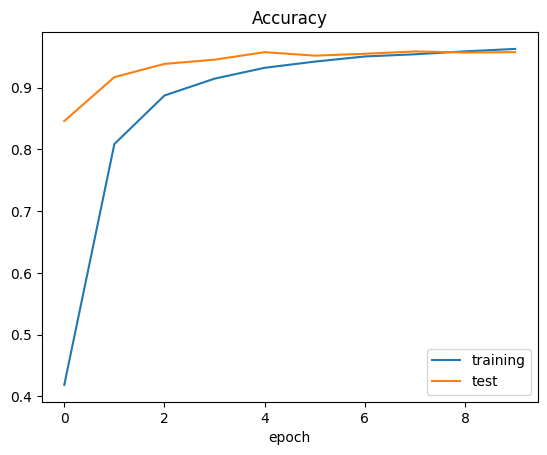

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','test'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [18]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])


Test score: 0.20147186517715454
Test accuracy: 0.957640528678894


In [19]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

395/395 [==============================] - 16s 38ms/step


In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        60
           1       0.96      0.99      0.98       720
           2       0.97      0.99      0.98       750
           3       0.98      0.96      0.97       450
           4       0.99      0.99      0.99       660
           5       0.96      0.95      0.96       630
           6       0.98      0.92      0.95       150
           7       0.98      0.99      0.98       450
           8       0.99      0.98      0.98       450
           9       0.97      1.00      0.98       480
          10       1.00      0.99      0.99       660
          11       0.97      0.88      0.92       420
          12       0.99      0.97      0.98       690
          13       0.97      1.00      0.98       720
          14       0.98      0.98      0.98       270
          15       0.91      0.75      0.82       210
          16       0.99      1.00      1.00       150
          17       0.99    

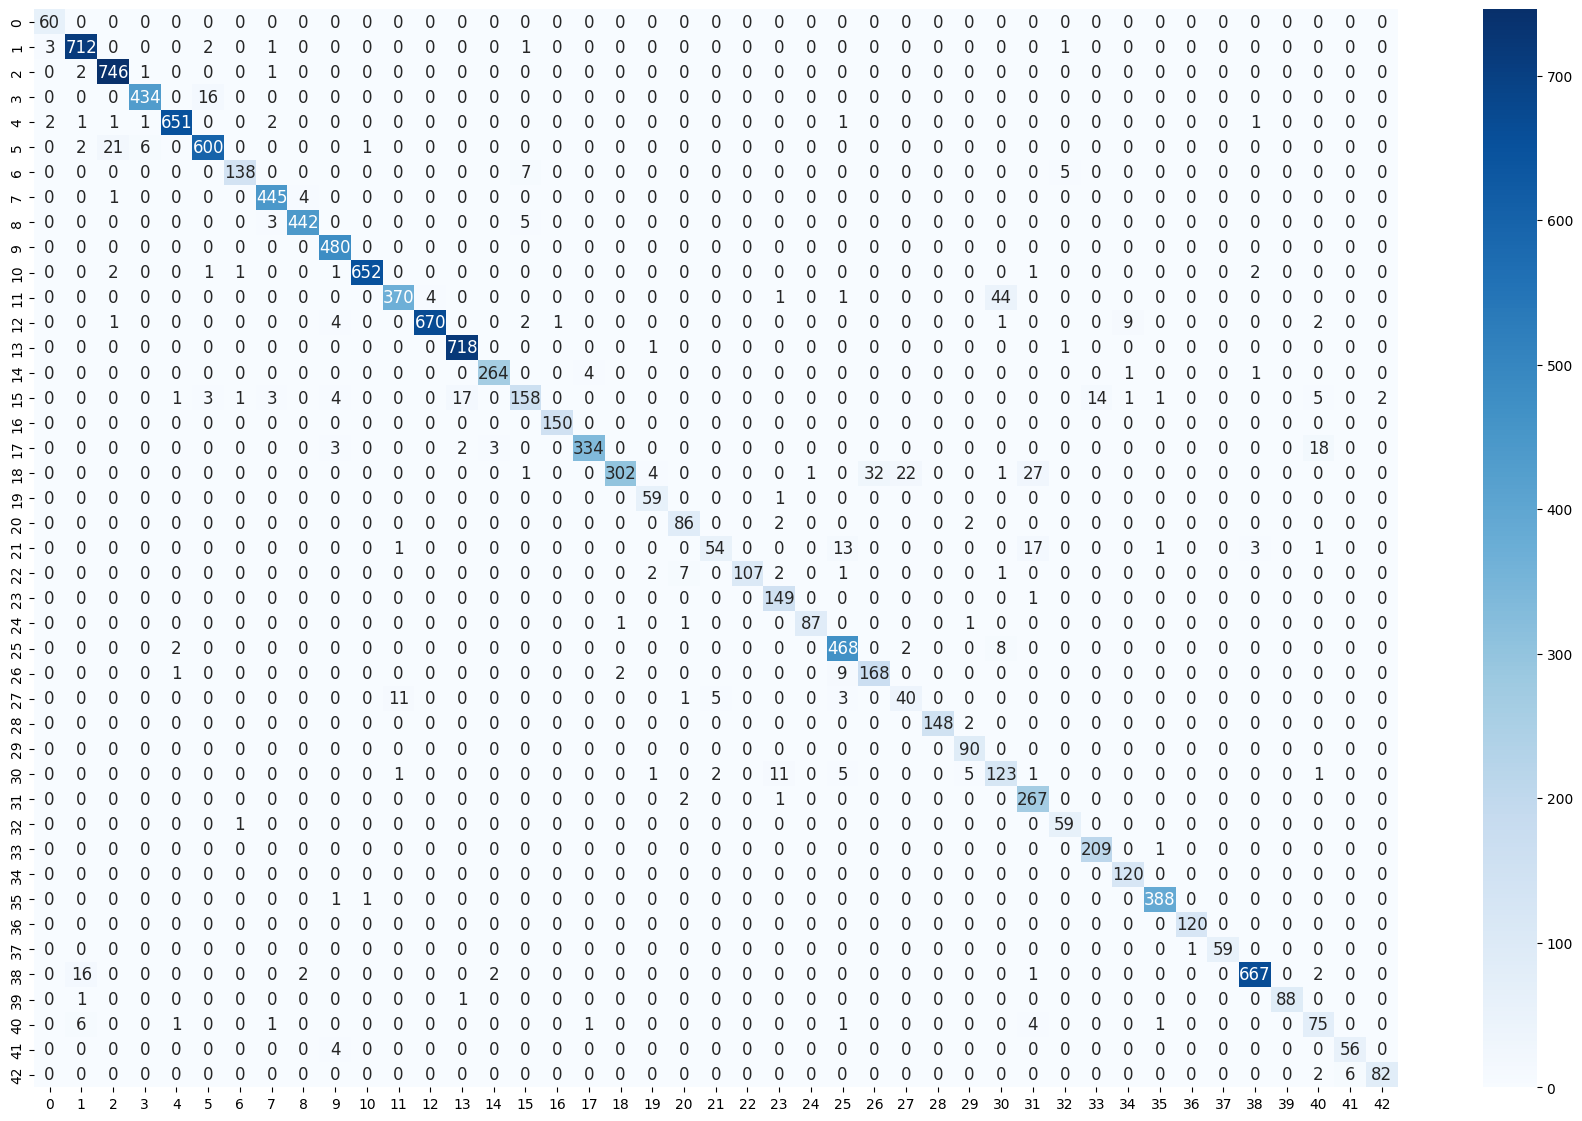

In [22]:
# Plot confusion matrix for the best performing model
import seaborn as sns
cm = confusion_matrix(y_test_class,y_pred_class)
plt.figure(figsize = (22, 14))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', annot_kws={'size':12})
plt.show()

In [23]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred_class,y_test_class)
score

0.9576405384006335

In [20]:
model.save(r"D:\Python-Project-Traffic-Sign-Classification\Traffic sign classification\finalTSR.h5")